# 3. Machine Learning for Classification

Predict churn rate of a telco company with logistic regression using scikit-learn.


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform

* Check if all the columns read correctly.
* Check if the churn variable needs any preparation
* Convert column types if needed


In [5]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
source_file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data_path = f'./data/{source_file_name}'

In [7]:
data = f'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/{source_file_name}'

In [8]:
# !wget $data -O data-week-3.csv 
!curl $data -o $data_path

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  954k  100  954k    0     0  2151k      0 --:--:-- --:--:-- --:--:-- 2154k


In [9]:
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [12]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

We see seniorcitizen should be categorical. And totalcharges numerical. Also churn shall be numerical, for logistic regression

Convert senior citizen to boolean

In [13]:
df['seniorcitizen'] = df['seniorcitizen'].astype('bool')

Totalcharges has '-' in some values, so pd converts to object. Now convert totalcharges to float64 (numeric) and convert NaN (i.e. '-') to 0. Note: coerce means do not manage errors, so '-' are NaNs

In [14]:
# Check number of NaNs after to_numeric
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc.isnull().sum()

11

In [15]:
# List of records with NaN total charges
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Note: astype('float64') will raise error. So we use to_numeric

In [16]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [17]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

Convert churn to integer, since this is a binary problem. df.churn returns a series of boolean type. astype in will convert it to integer

In [18]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

train_test_split suffles the index of the dataframe. Reset index of dataframe. Actually not needed.

In [22]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# We do not delete churn in the df_full_train, because we will use this dataset for EDA
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

* Use full_train dataset
* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables
* Take out variables that are neither numerical nor categorical

* df.describe()  
* df.info()  
* df.describe(include='object') 
* df.isnull
* df.nunique()
* df[].unique()
* df[].value_counts(), df.value_counts()
* With numpy: np.unique()

In [24]:
df_full_train.describe()

,tenure,monthlycharges,totalcharges,churn
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,32.277955,64.779127,2277.423953,0.269968
std,24.555211,30.104993,2266.412636,0.443982
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.400000,389.137500,0.000000
50%,29.000000,70.375000,1391.000000,0.000000
75%,55.000000,89.850000,3787.500000,1.000000
max,72.000000,118.650000,8684.800000,1.000000


In [25]:
df_full_train.describe(include='object')

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,5634,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,5442-pptjy,male,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
freq,1,2838,2932,3968,5087,2700,2479,2801,2498,2473,2781,2246,2213,3104,3321,1893


In [26]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   bool   
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object 


isnull returns True/False for each value, NaN or None are 'nulls', inf or empty strings are not) and sum() (sums for every column)
We already fixed the NaNs with converting totalcharges to numerical

In [27]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Check distribution of the target. Value_counts in normalize shows the relative frequencies (%). The mean % of ones is the same because the churn is binary

In [28]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [29]:
global_churn_rate = round(df_full_train.churn.mean(),2)
global_churn_rate

0.27

In [30]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen          bool
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

Customer id is considered as an unique identifier, so not categorical and not numerical. Churn is the target

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [33]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate (difference between churn rates of different groups i.e. gender)
* Risk ratio (relative values of churn rates of different groups - division)
* Mutual information - later

#### Churn rate

In [34]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,False,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,False,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,False,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,False,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,False,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [35]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [36]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [37]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [38]:
global_churn - churn_female

-0.006855983216553063

In [39]:
global_churn - churn_male

0.006754520462819769

In [40]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [41]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [42]:
global_churn - churn_partner

0.06493474245795922

In [43]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [44]:
global_churn - churn_no_partner

-0.05984095297455855

#### Risk ratio

churn of group / global churn. If >1, risk of churn is high. If <1, risk of churn is low.

In [45]:
churn_no_partner / global_churn

1.2216593879412643

In [46]:
churn_partner / global_churn

0.7594724924338315

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

Equivalent in pandas is df.groupby. But we can not add the risk and diference columns, because groupby returns a series.  
In orde to have a df, we use agg with the list or aggregated values.

In [47]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
False,0.242270,4722,-0.027698,0.897403
True,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Risk values of param values very different from 1 are more likely to stay or go. E.g contract - month to month are more likely compared to the global churn rate.

## 3.6 Feature importance: Mutual information

**Basically, it is used as a relative measure of the importance of a categorical variable with respect of another (target)**

Mutual information - concept from information theory, it tells us how much 
we can learn about one (categorical) variable if we know the value of another. For example, how much we know about churn by observing the gender variable. We can compare the results for each categorical feature in order to know which categorical variables affect more to churn, relatively.

* https://en.wikipedia.org/wiki/Mutual_information

In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [50]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [51]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [52]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [53]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

Apply applies a function along an axis of a dataframe. object passed are series. Parameter axis = 0 (by default) means that the index of the series is the index of dataframe, so function is called for each dataframe column. Apply will return a series and we can use sort_values

In [54]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

**Measures the feature importance for numerical variables**  

-1 < r < 1  
If r possitive, when x increases, y increases.  
Ir r is 0, no correlation. 

< 0.2, low correlation, means y rarely follows x 
0.2 to 0.5 moderate means sometime y follows x
and > 0.6 high, means y often follows x

In the case y is {0,1} and x € R, positive correlation means higher y, or lower if negative, 0 means no effect
* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [55]:
df_full_train.tenure.max()

72

corrwith works as apply, so by default column (axis = 0 => index or series) is used

In [56]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [57]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [58]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [59]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [60]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [61]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [62]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [63]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

Pandas .corr will only use numerical columns (and boolean)

In [64]:
df_full_train.corr()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.023443,0.225234,0.110459,0.141966
tenure,0.023443,1.000000,0.251072,0.828268,-0.351885
monthlycharges,0.225234,0.251072,1.000000,0.650913,0.196805
totalcharges,0.110459,0.828268,0.650913,1.000000,-0.196353
churn,0.141966,-0.351885,0.196805,-0.196353,1.000000


## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [65]:
from sklearn.feature_extraction import DictVectorizer

In [66]:
df_train.iloc[:2]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,False,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,False,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55


orient = 'records' so that each row will become a dictionary. to_dict returns a list of dicts

In [67]:
df_train.to_dict(orient='records')[:1]

[{'customerid': '8015-ihcgw',
  'gender': 'female',
  'seniorcitizen': False,
  'partner': 'yes',
  'dependents': 'yes',
  'tenure': 72,
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'monthlycharges': 115.5,
  'totalcharges': 8425.15}]

sparse=False. When True, sparse matrix is used. Use it when there are a lot of categories in each categorical variables, since this means a huge number of zeros. For X_val we do not need to fit, just transform.

In [68]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [74]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [75]:
X_train[:1]

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03]])

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [76]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [77]:
z = np.linspace(-7, 7, 51)

In [78]:
sigmoid(10000)

1.0

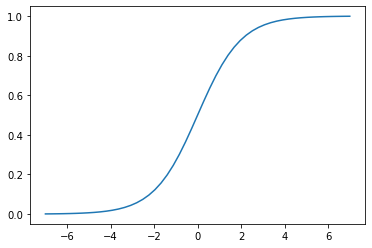

In [79]:
plt.plot(z, sigmoid(z))

Bias is the first element of w, so xi[0] = 1

In [80]:
xi = np.array([1,2,3])
w = np.array([1,1,1])

In [81]:
def linear_regression(xi, w):
    result = 0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [82]:
def logistic_regression(xi, w):
    score = 0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

In [83]:
linear_regression(xi,w)

6

In [84]:
logistic_regression(xi, w)

0.9975273768433653

In [85]:
def linear_regression(xi, w):
    return np.dot(xi,w)

In [86]:
def sigmoid(z):
    return 1 / 1 + np.exp(-z)

In [87]:
def logistic_regression(xi, w):
    return sigmoid(linear_regression(xi,w))

In [88]:
linear_regression(xi,w)

6

In [89]:
logistic_regression(xi, w)

1.0024787521766663

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy (basic metric for model evaluation)

In [90]:
# Note LogisticRegression applies regularization by default (L2)
from sklearn.linear_model import LogisticRegression

In [91]:
df_train.shape

(4225, 20)

In [92]:
model = LogisticRegression()
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

c:\Users\MARCOS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
model.intercept_[0]

-0.10901108362798215

In [94]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.407, -0.029, -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.071,  0.   ])

Sometimes we say the score is 0.5 and the prediction is True. Althouth the model predicts 0.5 and the score may be thought as the w0 + wX and prediction is sigmoid of score. Predict will return the predicted labels, while predict_proba will return the prediction probability

In [95]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [96]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00897086, 0.20452115, 0.2122905 , ..., 0.13618342, 0.79967264,
       0.83734038])

In [97]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [98]:
X_train[44]

array([  1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   1.  ,   0.  ,   0.  ,  25.55,   0.  ,   1.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   0.  ,  18.  , 467.85])

In [99]:
(y_val == churn_decision).mean()

0.8034066713981547

In [100]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [101]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [102]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [103]:
df_pred.correct.mean()

0.8034066713981547

In [104]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [105]:
small = ['contract', 'tenure', 'monthlycharges']

In [106]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [107]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [108]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [109]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [110]:
X_train_small = dv_small.transform(dicts_train_small)

In [111]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [112]:
w0 = model_small.intercept_[0]
w0

-2.476775659755188

In [113]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [114]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

**Weights and correlation**  
w > 0 is positive correlation... The higher the feature, the higher the target. In the score, this term sums positive -> increase churn prov  
The same for negative. Check that one_year is categorical, negative, and two years affects more negatively to the score and hence to sigmoid towards 0 (no churn).  

Evaluate a customer with monthly contract, 50usd/month, tenure = 24

In [115]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [116]:
sigmoid(_)

33.23329743215228

## 3.12 Using the model

In [117]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [118]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [119]:
y_full_train = df_full_train.churn.values

In [120]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [121]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [122]:
X_test = dv.transform(dicts_test)

In [123]:
y_pred = model.predict_proba(X_test)[:,1]

In [124]:
churn_decision = (y_pred >= 0.5)

In [125]:
(churn_decision == y_test).mean()

0.815471965933286

In [126]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': False,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [127]:
X_small = dv.transform([customer])

In [128]:
model.predict_proba(X_small)[0, 1]

0.5968852088274378

In [129]:
y_test[-1]

1

## Saving the model

In [ ]:
import pickle
with open('model.bin', 'wb') as f_out:
  pickle.dump(model, f_out)
with open('dv.bin', 'wb') as f_out:
  pickle.dump(dv, f_out)

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients



# 4. Evaluation Metrics for Classification
## 4.1 Evaluation metrics: session overview 
*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [442]:
# Read dataset

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data preparation

# Categorical
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# Change data types
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

# Prepare target
df.churn = (df.churn == 'yes').astype(int)

In [443]:
# Split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Prepare target 

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [444]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [445]:
# Prepare features

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Fit

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [446]:
# Evaluate baseline model

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

Accuracy: Total number of right predictions / Total number of predictions

In [447]:
len(y_val)

1409

In [448]:
y_pred

array([0.00898494, 0.20466194, 0.21238391, ..., 0.13630448, 0.79978165,
       0.83743557])

In [449]:
from sklearn.metrics import accuracy_score

y_pred >= t will return the labels (True, False, equals to 1, 0, etc..) for that treshold

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


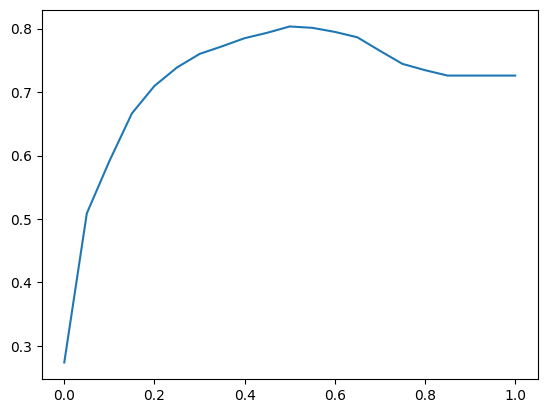

In [450]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)
plt.plot(thresholds, scores)

A dummy model predicting none will churn, will have an accuracy of 73%.
Because we have class imbalance (3:1)... y_val is biased, there are much more "non churn" than "churn". Check that it is the same accuracy number we will have when t=1.0, which means that all y_pred > y will be false, so that comparing to y_val, will math all 0 in y_val.
Do not use accuracy with class imbalance

% of non churn 0.7260468417317246


<AxesSubplot: ylabel='Count'>

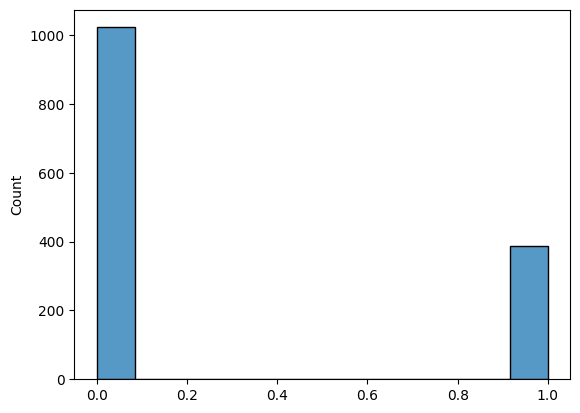

In [451]:
print(f'% of non churn {1 - y_val.mean()}')
sns.histplot(y_val)

## 4.0 ROC curve and AUC

* Different types of errors and correct decisions
* Arranging them in a table

In [452]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [453]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [454]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [455]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [456]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

tpr = tp / (tp + fn). % of positive class observation that the model predicts correctly. fn are the errors (model predicts false class but the observation is actually true class)  
tpr = recall.  
1 - tpr is the % of errors for the true classes. That is, we do not correctly detect the fp examples, hence if we do an action (send a promotional email), we are actually don't do that action for fp

fpr = fp / (fp + tn). % of negative labels that the model predicts incorrectly. fp are negative class examples that are classified as positive class by our model. That is to say that we are doing the action but be shouldn't.

Ideally, we want tpr=1 and fpr=1. These values depend on the threshold.
If threshold = 0, all examples are classified as true, and tpr = 1, but fpr is 1 as well: tn = 0
If threshold = 1, all examples are classified as false, and tpr = 0 (tp = 0), and fpr = 0 as well (fp = 0)

In [457]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [458]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

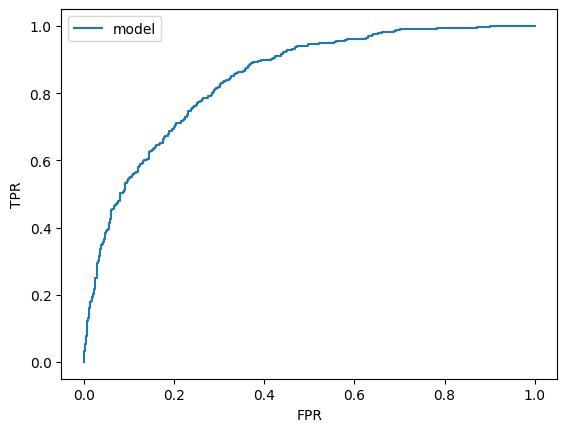

In [459]:
plt.plot(fpr, tpr, label='model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [460]:
auc(fpr, tpr)

0.8438429084426076

AUC is interpreted as the probability of a score for a randomly selected positive example to be higher that the score for a randomly selected negative example. If AUC is 1, the model is ideal